In [1]:
import numpy as np
import pandas as pd

In [3]:
# Set seed for reproducibility
np.random.seed(42)

In [5]:
# Number of data points
n = 120

In [7]:
# Create synthetic features
ages = np.random.randint(18, 65, size=n)  # Age between 18 and 65
sleep_hours = np.random.normal(7, 1.5, size=n)  # Normally distributed sleep hours
exercise_hours = np.abs(np.random.normal(3, 1, size=n))  # Weekly exercise hours
screen_time = np.random.normal(5, 2, size=n)  # Daily screen time in hours
coffee_intake = np.abs(np.random.normal(2, 1, size=n))  # Daily coffee intake

In [9]:
# Combine into a DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Sleep_Hours': sleep_hours,
    'Exercise_Hours': exercise_hours,
    'Screen_Time': screen_time,
    'Coffee_Intake': coffee_intake
})


In [11]:
# Preview
print(df.head())

   Age  Sleep_Hours  Exercise_Hours  Screen_Time  Coffee_Intake
0   56     8.818259        5.273345     0.566478       1.127896
1   46     8.850245        3.146975     7.779133       1.328976
2   32     4.638767        3.539609     8.740848       2.335949
3   60     7.956929        1.501704     8.376034       2.494409
4   25     3.933365        2.988557     3.769510       1.998364


In [15]:
# Check for null values
print("Null values per column:\n", df.isnull().sum())


Null values per column:
 Age               0
Sleep_Hours       0
Exercise_Hours    0
Screen_Time       0
Coffee_Intake     0
dtype: int64


In [17]:
# Remove any rows with nulls (not expected, but for completeness)
df_clean = df.dropna()


In [19]:
# Prove that data has at least 100 rows
print("\nNumber of data points after cleaning:", len(df_clean))


Number of data points after cleaning: 120


In [21]:
# Optional: show summary statistics
print("\nSummary statistics:\n", df_clean.describe())


Summary statistics:
               Age  Sleep_Hours  Exercise_Hours  Screen_Time  Coffee_Intake
count  120.000000   120.000000      120.000000   120.000000     120.000000
mean    40.666667     6.942545        3.000167     4.798928       2.070171
std     13.820782     1.507858        1.072273     2.181060       0.993379
min     18.000000     2.680815        1.009400    -1.728191       0.007568
25%     28.000000     5.940284        2.258909     3.413302       1.373411
50%     41.000000     6.984745        2.980068     4.748732       2.075657
75%     53.000000     8.062402        3.595447     6.530887       2.737554
max     64.000000    10.238093        6.187033     9.286410       4.172842


In [23]:
import numpy as np

In [25]:
# 1. Mean age
mean_age = np.mean(df_clean['Age'])

In [27]:
# 2. Median sleep hours
median_sleep = np.median(df_clean['Sleep_Hours'])

In [29]:
# 3. Standard deviation of screen time
std_screen = np.std(df_clean['Screen_Time'])

In [31]:
# 4. Correlation between sleep and coffee intake
corr_sleep_coffee = np.corrcoef(df_clean['Sleep_Hours'], df_clean['Coffee_Intake'])[0, 1]

In [33]:
# 5. Maximum exercise hours
max_exercise = np.max(df_clean['Exercise_Hours'])

In [35]:
# Print results
print(f"\nMean Age: {mean_age:.2f}")
print(f"Median Sleep Hours: {median_sleep:.2f}")
print(f"Std Dev Screen Time: {std_screen:.2f}")
print(f"Correlation (Sleep vs Coffee): {corr_sleep_coffee:.2f}")
print(f"Max Exercise Hours: {max_exercise:.2f}")


Mean Age: 40.67
Median Sleep Hours: 6.98
Std Dev Screen Time: 2.17
Correlation (Sleep vs Coffee): -0.15
Max Exercise Hours: 6.19


In [37]:
from scipy import stats

# Perform a Pearson correlation test
pearson_result = stats.pearsonr(df_clean['Sleep_Hours'], df_clean['Screen_Time'])
print("\nPearson correlation (Sleep vs Screen Time):", pearson_result)


Pearson correlation (Sleep vs Screen Time): PearsonRResult(statistic=0.033480605819695725, pvalue=0.7165865076883425)


In [39]:
import statsmodels.api as sm

# Regress Coffee Intake on Sleep and Exercise
X = df_clean[['Sleep_Hours', 'Exercise_Hours']]
X = sm.add_constant(X)  # add intercept
y = df_clean['Coffee_Intake']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Coffee_Intake   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.765
Date:                Tue, 20 May 2025   Prob (F-statistic):             0.0671
Time:                        17:56:42   Log-Likelihood:                -166.20
No. Observations:                 120   AIC:                             338.4
Df Residuals:                     117   BIC:                             346.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4109      0.468      5.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

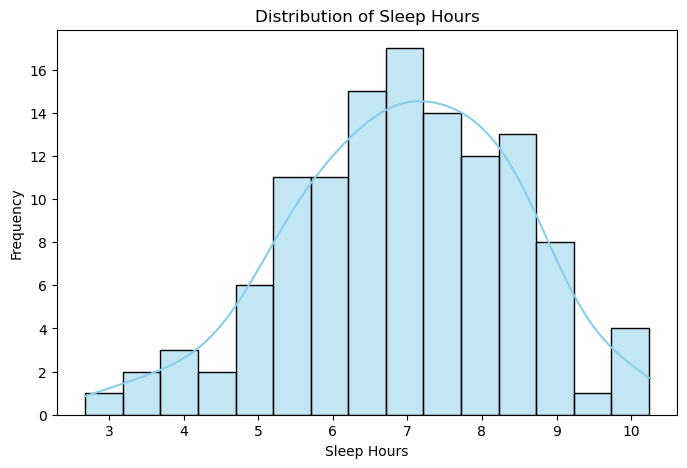

In [43]:
# Visualization 1: Histogram of Sleep Hours
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Sleep_Hours'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.show()


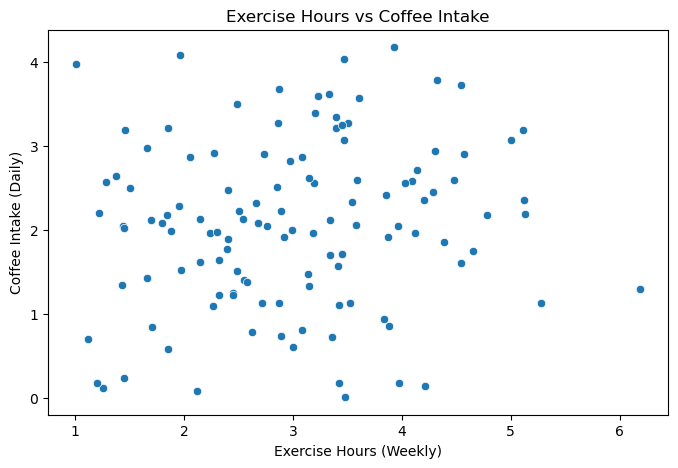

In [45]:
# Visualization 2: Scatter Plot of Exercise vs Coffee Intake
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Exercise_Hours', y='Coffee_Intake')
plt.title("Exercise Hours vs Coffee Intake")
plt.xlabel("Exercise Hours (Weekly)")
plt.ylabel("Coffee Intake (Daily)")
plt.show()

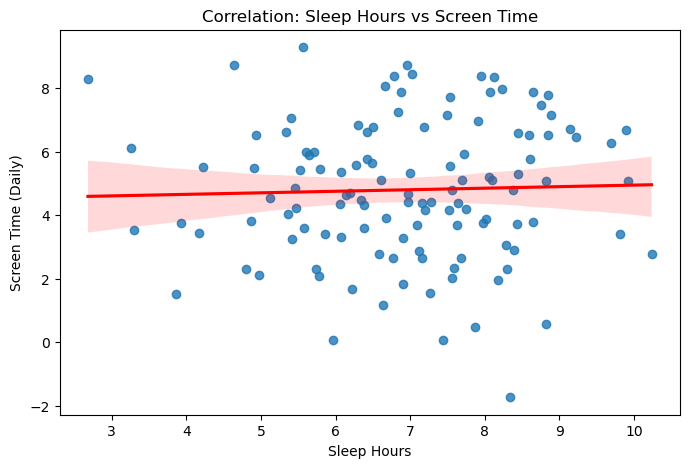

In [47]:
# Correlation Plot: Sleep vs Screen Time with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(data=df_clean, x='Sleep_Hours', y='Screen_Time', line_kws={'color': 'red'})
plt.title("Correlation: Sleep Hours vs Screen Time")
plt.xlabel("Sleep Hours")
plt.ylabel("Screen Time (Daily)")
plt.show()